In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [86]:
df = pd.read_csv('diabetic_data.csv')

In [87]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [92]:
print(df.isnull().sum())

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [94]:
df.shape

(101766, 50)

In [96]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [98]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [100]:
# Replace "?" with NaN
df.replace('?', np.nan, inplace=True)



In [102]:
# Missing values in each column
missing = df.isnull().sum()
missing = missing[missing > 0]
missing_percent = (missing / len(df)) * 100
print(missing_percent.sort_values(ascending=False))




weight               96.858479
medical_specialty    49.082208
payer_code           39.557416
race                  2.233555
diag_3                1.398306
diag_2                0.351787
diag_1                0.020636
dtype: float64


In [104]:
# أولاً: حذف الأعمدة ذات الغياب العالي
df.drop(['weight', 'medical_specialty', 'payer_code'], axis=1, inplace=True)







In [106]:

# ثانيًا: ملء القيم المفقودة البسيطة
df['race'].fillna('Unknown', inplace=True)
df['diag_1'].fillna('Unknown', inplace=True)
df['diag_2'].fillna('Unknown', inplace=True)
df['diag_3'].fillna('Unknown', inplace=True)


In [108]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_outpatient         101766 non-null  int64 
 13  number_emergency          101766 non-null  int64 
 14  numb

In [110]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [112]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\nUnique values in '{col}':\n{df[col].value_counts()}")


Unique values in 'race':
Caucasian          76099
AfricanAmerican    19210
Unknown             2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

Unique values in 'gender':
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

Unique values in 'age':
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

Unique values in 'diag_1':
428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
373       1
314       1
684       1
217       1
V51       1
Name: diag_1, Length: 717, dtype: int64

Unique values in 'diag_2':
276     6752
428     6662
250     6071
427     5036
401     3736
        ... 
E918       1
46         1
V13        1
E850       1
927        1
Name: diag_2, Length: 749, dtype: int64

Unique values in 'diag_3':
2

In [114]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [116]:
print("\nUnique values in 'readmitted':")





Unique values in 'readmitted':


In [118]:
print(df['readmitted'].unique())

['NO' '>30' '<30']


In [120]:
df['readmitted'].map({'NO': 0, '>30': 0, '<=30': 1})

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
101761    0.0
101762    0.0
101763    0.0
101764    0.0
101765    0.0
Name: readmitted, Length: 101766, dtype: float64

In [122]:
# Mapping effectiveness based on correct unique value '<30'
df['effectiveness'] = df['readmitted'].map({
    'NO': 0,
    '>30': 0,
    '<30': 1
})

In [124]:
# Check result
print(df[['readmitted', 'effectiveness']].head(10))
print("\nEffectiveness value counts:")
print(df['effectiveness'].value_counts(dropna=False))

  readmitted  effectiveness
0         NO              0
1        >30              0
2         NO              0
3         NO              0
4         NO              0
5        >30              0
6         NO              0
7        >30              0
8         NO              0
9         NO              0

Effectiveness value counts:
0    90409
1    11357
Name: effectiveness, dtype: int64


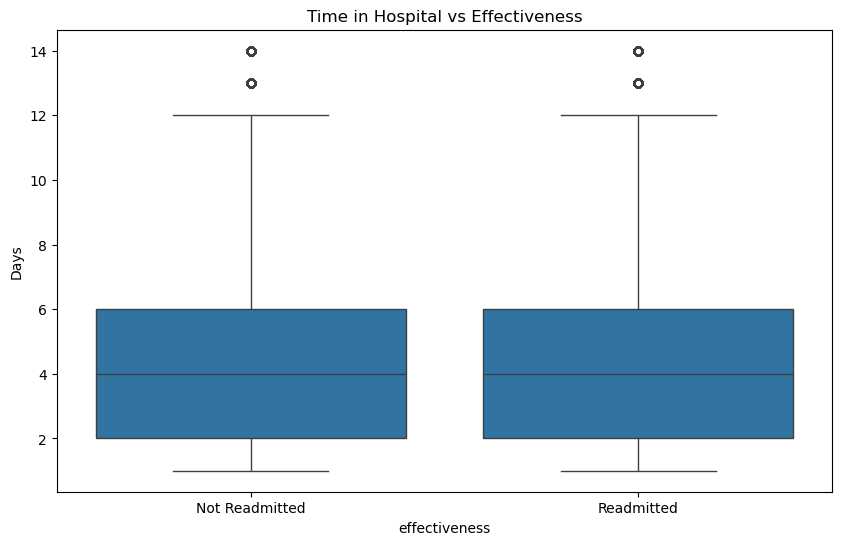

In [126]:
# Encode effectiveness temporarily
df_temp = df.copy()
df_temp['effectiveness_label'] = df_temp['effectiveness'].map({0: 'Not Readmitted', 1: 'Readmitted'})

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_temp, x='effectiveness', y='time_in_hospital')
plt.xticks([0, 1], ['Not Readmitted', 'Readmitted'])
plt.title('Time in Hospital vs Effectiveness')
plt.ylabel('Days')
plt.show()

0    90409
1    11357
Name: effectiveness, dtype: int64


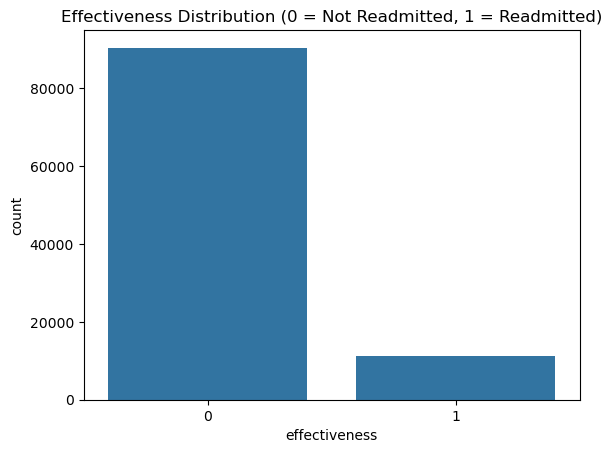

In [128]:


# Check distribution
print(df['effectiveness'].value_counts())
sns.countplot(data=df, x='effectiveness')
plt.title('Effectiveness Distribution (0 = Not Readmitted, 1 = Readmitted)')
plt.show()

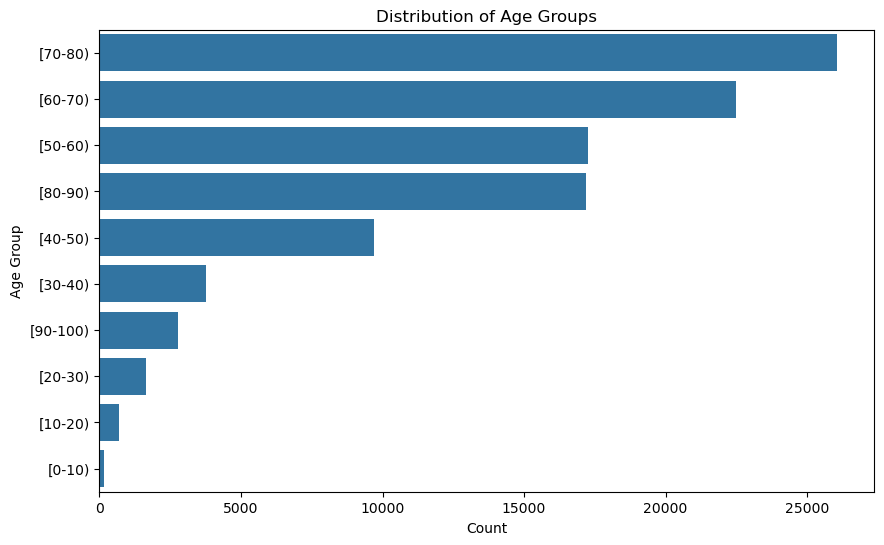

In [62]:
# Plot age distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='age', order=df['age'].value_counts().index)
plt.title('Distribution of Age Groups')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.show()

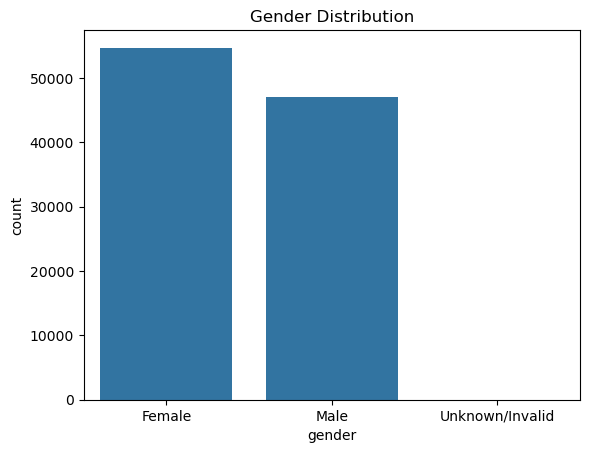

In [64]:
# Plot gender
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')
plt.show()

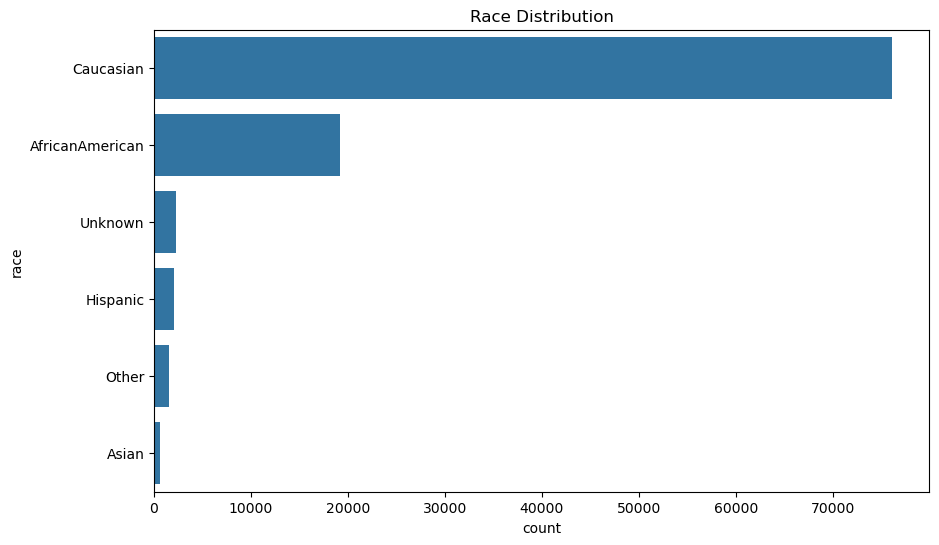

In [66]:
# Plot race
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='race', order=df['race'].value_counts().index)
plt.title('Race Distribution')
plt.show()

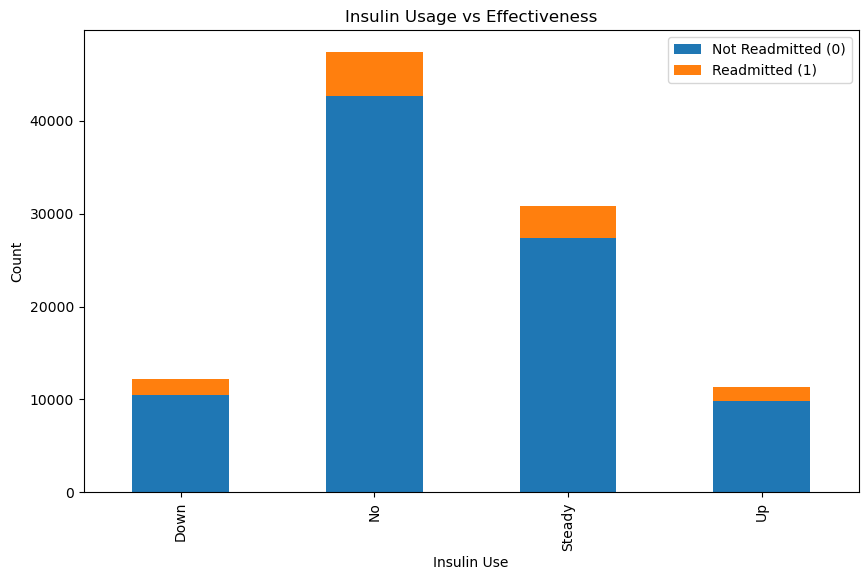

In [130]:
# Crosstab
ct_insulin = pd.crosstab(df['insulin'], df['effectiveness'])
ct_insulin.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Insulin Usage vs Effectiveness')
plt.xlabel('Insulin Use')
plt.ylabel('Count')
plt.legend(['Not Readmitted (0)', 'Readmitted (1)'])
plt.show()

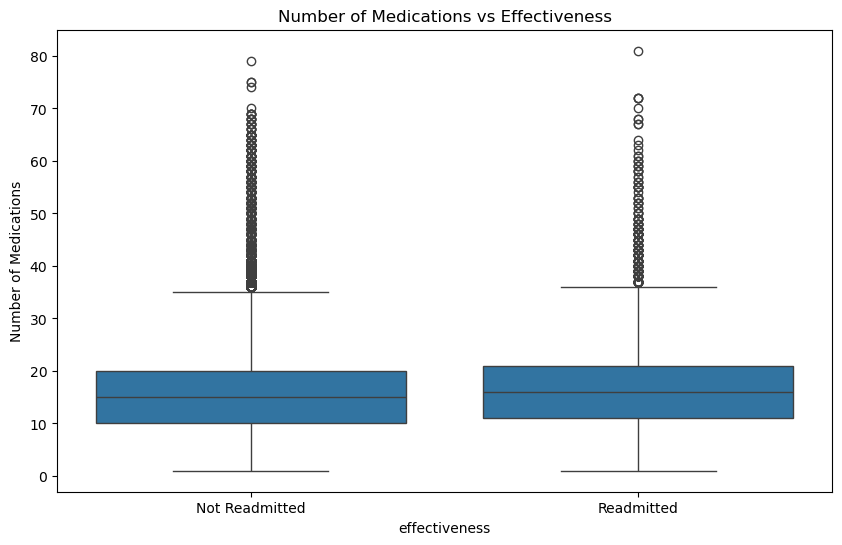

In [132]:
# Convert to numeric
df['num_medications'] = pd.to_numeric(df['num_medications'], errors='coerce')

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_temp, x='effectiveness', y='num_medications')
plt.xticks([0, 1], ['Not Readmitted', 'Readmitted'])
plt.title('Number of Medications vs Effectiveness')
plt.ylabel('Number of Medications')
plt.show()

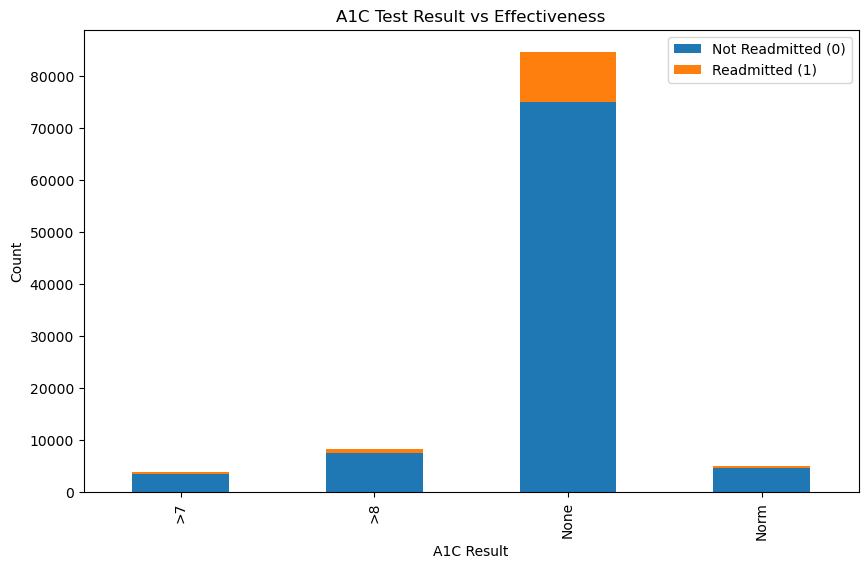

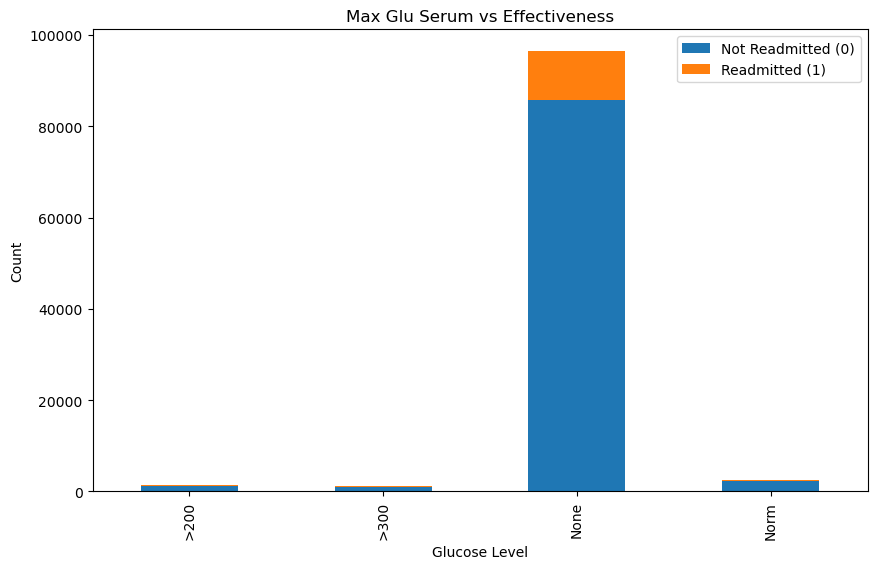

In [134]:
# A1C Result
ct_a1c = pd.crosstab(df['A1Cresult'], df['effectiveness'])
ct_a1c.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('A1C Test Result vs Effectiveness')
plt.xlabel('A1C Result')
plt.ylabel('Count')
plt.legend(['Not Readmitted (0)', 'Readmitted (1)'])
plt.show()

# Max Glu Serum
ct_glu = pd.crosstab(df['max_glu_serum'], df['effectiveness'])
ct_glu.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Max Glu Serum vs Effectiveness')
plt.xlabel('Glucose Level')
plt.ylabel('Count')
plt.legend(['Not Readmitted (0)', 'Readmitted (1)'])
plt.show()

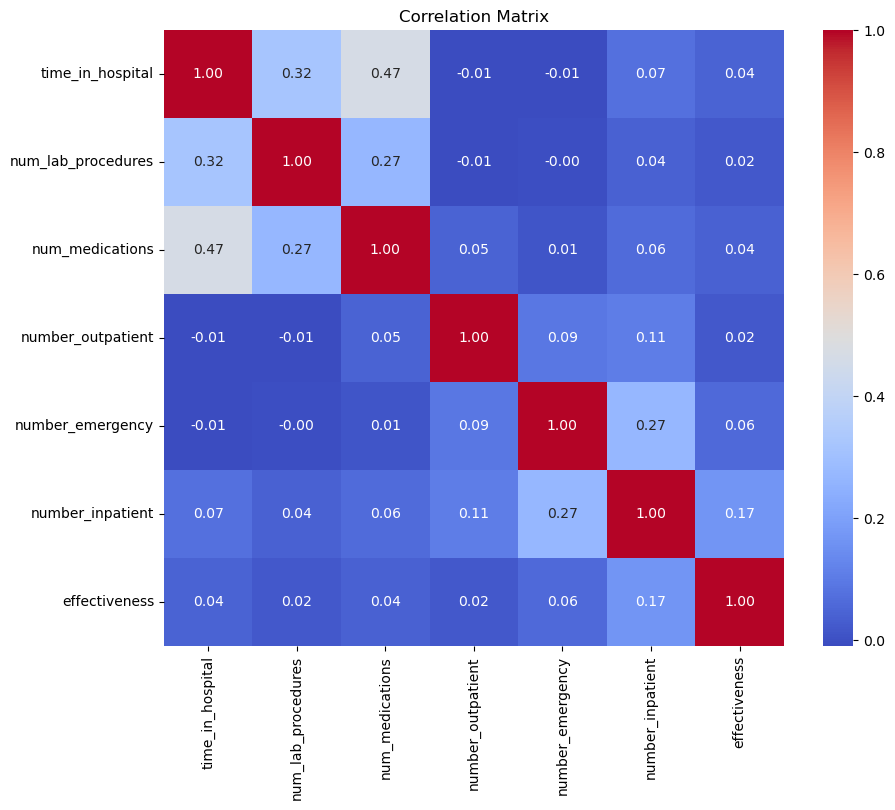

In [136]:
# Select numerical features
numerical_cols = ['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient']

# Calculate correlation matrix
corr = df[numerical_cols + ['effectiveness']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()